In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../data/MNIST', one_hot=False)

Extracting ../data/MNIST/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/t10k-labels-idx1-ubyte.gz


In [69]:
# A bunch of utility functions

def show_array_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')
    
def imgshow(array_image):
    """ Show one array image as uint8 and remove axis labels """
    sqrtimg = int(np.ceil(np.sqrt(image.shape[0])))
    imshow_noax(image.reshape([sqrtimg,sqrtimg]), normalize=True)

def array_to_image(array):
    sqrtimg = int(np.ceil(np.sqrt(array.shape[0])))
    x = np.array(array.reshape([sqrtimg,sqrtimg]))
    return x
    
def image_to_array(image):
    l = image.shape[0]*image.shape[1]
    x = np.array(image.reshape([l]))
    return x

def center_square(array_image, square_h, square_w, pixel_value = 0.45):
    img = array_to_image(array_image)
    h, w = img.shape                     
    j = int(round((h - square_h)/2.))
    i = int(round((w - square_w)/2.))
    img[j:j+square_h, i:i+square_w] = pixel_value
    img = image_to_array(img)
    return img

def mask_images(array_images, masktype, *args):
    """ Retruns an array of image and masked image pairs """
    masked_images = []
    for array_image in array_images:
        img = array_to_image(array_image)
        h, w = img.shape
        
        if masktype == 'square':
            masked = center_square(array_image,*args)
        elif masktype == 'left':
            c = h // 2
            masked = img
            masked[:, :c] = 0.0
            masked = image_to_array(masked)
        elif masktype == 'random':
            fraction_masked = 0.3
            mask = np.random.rand(array_image.shape[0])
            mask[mask < fraction_masked] = 0
            mask = array_to_image(mask)
            masked = img*mask
            masked = image_to_array(masked)
        elif masktype == 'random_square':
            for i in range(5):
                i = int(h*np.random.rand(1))
                j = int(w*np.random.rand(1))
                img[j:j+6, i:i+6] = 0.5
            masked = img
            masked = image_to_array(masked)
        masked_images.append(array_image)
        masked_images.append(masked)
    return np.array(masked_images)

In [70]:
mnist.train.images[0].shape

(784,)

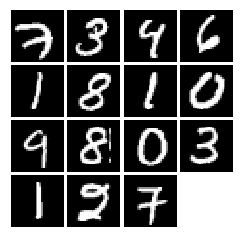

In [71]:
# show a batch
show_array_images(mnist.train.images[0:15],)

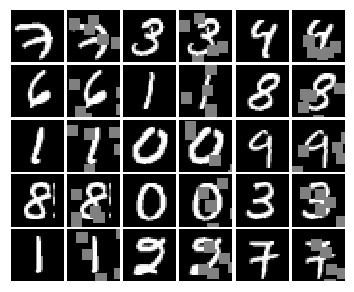

In [72]:
images = mask_images(mnist.train.images[0:15],'random_square',10,10)
show_array_images(images)

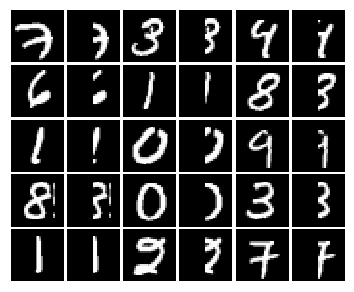

In [6]:
images = mask_images(mnist.train.images[0:15],'left')
show_array_images(images)